In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='morningstar', start='2007-1-1')['Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

PG
Symbol Date                
PG     2018-06-11  0.004525
       2018-06-12 -0.003748
       2018-06-13 -0.010019
       2018-06-14 -0.006297
       2018-06-15  0.018127

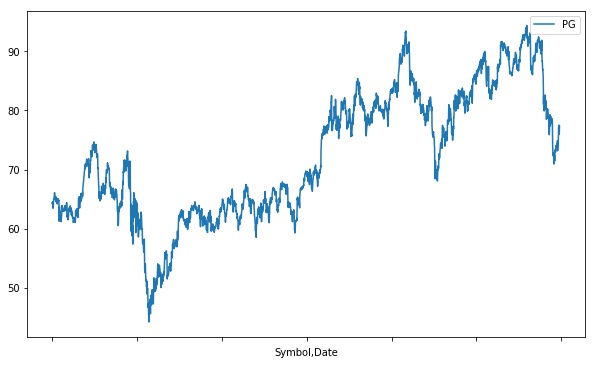

In [4]:
data.plot(figsize=(10, 6));

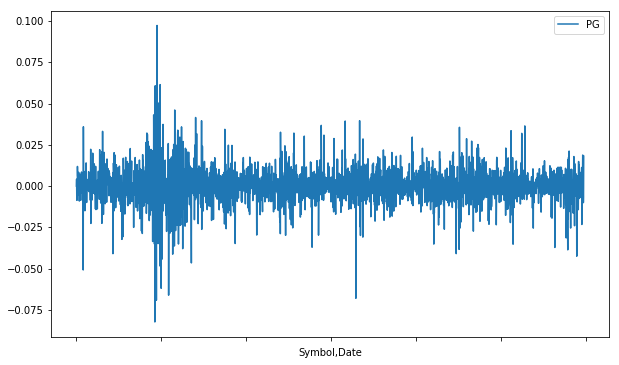

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000062
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000116
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000004
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.010776
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([4.0466805e-06])

In [13]:
drift.values

array([4.0466805e-06])

In [14]:
stdev.values

array([0.01077585])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.93580639, 0.42545445],
       [0.78524789, 0.5208607 ],
       [0.09066796, 0.73692828],
       [0.72997326, 0.54411507],
       [0.38828721, 0.33884756],
       [0.93349494, 0.38355702],
       [0.24010202, 0.56388435],
       [0.99109838, 0.19915347],
       [0.1814505 , 0.79219341],
       [0.66457534, 0.44123724]])

In [17]:
norm.ppf(x)

array([[ 1.5204926 , -0.18795887],
       [ 0.79004033,  0.05231388],
       [-1.33665305,  0.63390406],
       [ 0.61273211,  0.1108064 ],
       [-0.28378596, -0.41561038],
       [ 1.5023369 , -0.29615196],
       [-0.70597443,  0.16082491],
       [ 2.36968505, -0.84464881],
       [-0.90985118,  0.81405545],
       [ 0.42498265, -0.14783311]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.45084306,  0.98554004],
       [-1.85473466,  0.09020206],
       [-1.50851433, -1.09498269],
       [ 1.83581845, -0.57113024],
       [ 1.68150261, -0.67839179],
       [ 1.08513726,  0.06378691],
       [ 0.26665257,  0.72117084],
       [-0.13614911,  2.19043876],
       [ 1.90335802,  0.58776256],
       [-0.98941329,  0.37945198]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[1.00037455, 1.00765019, 1.00464415, ..., 0.9930693 , 0.993326  ,
        1.00068825],
       [1.00277247, 1.00548992, 0.97139436, ..., 1.00058423, 0.99565719,
        1.00096988],
       [1.01119156, 1.00522034, 0.98819412, ..., 1.01453764, 0.99448186,
        1.00367909],
       ...,
       [1.0035154 , 0.98325634, 1.01856249, ..., 1.01579892, 0.98983238,
        1.00663224],
       [1.02148141, 0.98855075, 1.00381439, ..., 1.00002412, 0.98924514,
        1.00204574],
       [0.99886531, 1.00891068, 1.00059458, ..., 0.98522129, 0.97462776,
        0.99429148]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    77.38
Name: (PG, 2018-06-15 00:00:00), dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[77.38, 77.38, 77.38, ..., 77.38, 77.38, 77.38],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[ 77.38      ,  77.38      ,  77.38      , ...,  77.38      ,
         77.38      ,  77.38      ],
       [ 77.59453399,  77.8048098 ,  75.16649564, ...,  77.42520805,
         77.04395355,  77.45504909],
       [ 78.4629375 ,  78.21097704,  74.27908873, ...,  78.55078802,
         76.61881459,  77.74001282],
       ...,
       [ 60.72409717, 114.33870801, 137.04516499, ..., 109.14422324,
         65.92892625,  85.34565099],
       [ 62.02853628, 113.02961572, 137.56790879, ..., 109.14685621,
         65.21986989,  85.52024638],
       [ 61.95815298, 114.03678624, 137.64970381, ..., 107.53380602,
         63.5650957 ,  85.03205205]])

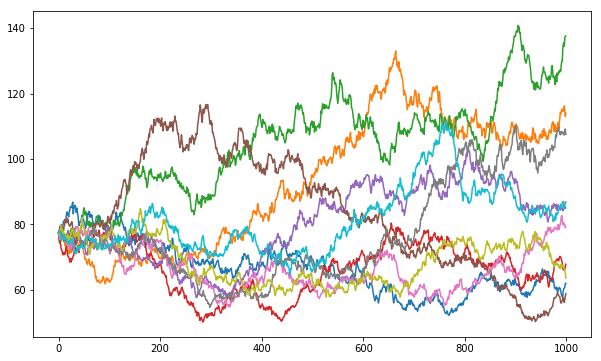

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);